In [15]:
# import libaries 
import numpy as np 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

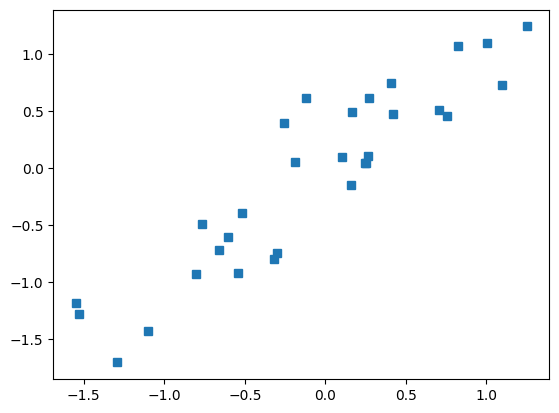

In [16]:
# create data
N = 30
x= torch.randn(N,1)
y = x + torch.randn(N,1)/2 

# and plot 
plt.plot(x,y,'s')
plt.show()

In [17]:
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output Layer
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
#learning rate
learningRate = .05

#loss function 
lossfun = nn.MSELoss()

#optimizer(the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

In [19]:
# train the model 
numepochs = 500
losses = torch.zeros(numepochs)
for epochi in range(numepochs):
    #forward pass
    yHat = ANNreg(x)
    #compute loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




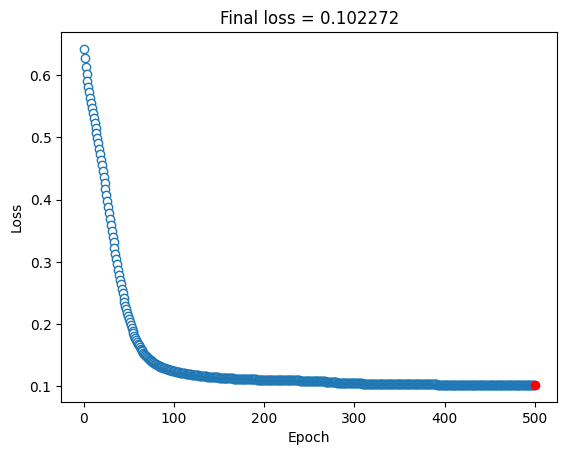

In [20]:
#manually compute losses
# final forward pass
predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o', markerfacecolor = 'w', linewidth =.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g'%testloss.item())
plt.show()

In [21]:
testloss.item()

0.10227163881063461

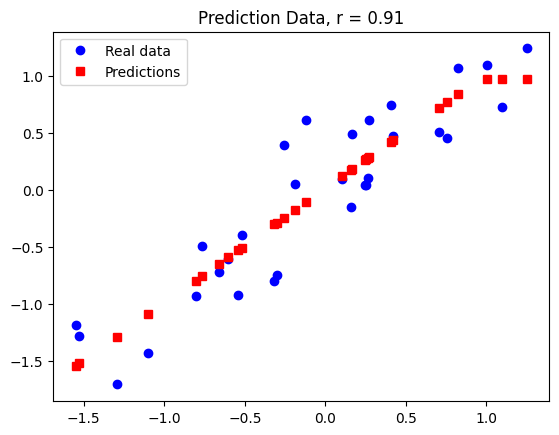

In [24]:



plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')

# Calculate and set the correlation coefficient as the plot title
correlation_coefficient = np.corrcoef(y.T, predictions.detach().T)[0, 1]
plt.title(f'Prediction Data, r = {correlation_coefficient:.2f}')

plt.legend()
plt.show()
